In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
import numpy as np
import os
import glob

In [11]:
#데이터 준비
(독립, 종속), (독립2, 종속2) = tf.keras.datasets.cifar10.load_data()
#print(독립.shape, 종속.shape)

독립r = 독립.reshape(50000, 32, 32, 3)
독립2r = 독립2.reshape(10000, 32, 32, 3)

# 종속 데이터를 1차원 배열로 변환
종속 = pd.get_dummies(종속.ravel())
#print(종속)
# print(독립r.shape, 종속.shape)
# plt.imshow(독립2[1])

In [10]:
#모델 만들기
X = tf.keras.layers.Input(shape=[32, 32, 3])
H = tf.keras.layers.Flatten() (X)
H = tf.keras.layers.Dense(84, activation='swish') (H)
Y = tf.keras.layers.Dense(10, activation='softmax') (H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#모델 학습하기
# model.fit(독립r, 종속, epochs=300, verbose=0)
model.fit(독립r, 종속, epochs=10)

#모델 구조 확인
#model.summary()

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 39.4334 - accuracy: 0.1056
Epoch 2/10
1563/1563 [==============================] - 2s 2ms/step - loss: 2.6098 - accuracy: 0.0988
Epoch 3/10
1563/1563 [==============================] - 2s 2ms/step - loss: 2.3975 - accuracy: 0.0992
Epoch 4/10
1563/1563 [==============================] - 2s 2ms/step - loss: 2.3990 - accuracy: 0.0984
Epoch 5/10
1563/1563 [==============================] - 2s 2ms/step - loss: 2.3758 - accuracy: 0.0972
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3632 - accuracy: 0.0972
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3604 - accuracy: 0.0979
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3445 - accuracy: 0.0969
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3466 - accuracy: 0.0953
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.34

In [13]:

image_list = []
image_listR = []
gray_image_list = []
gray_image_listR = []
inverted_gray_image_list = []
inverted_gray_image_listR = []

def ImageSetting(file_name, number):
    # image_path = os.path.join(os.getcwd(), file_name)
    image_path = glob.glob('./stones_reform/*/*.png')
    image = Image.open(image_path)
    gray_image = image.convert('L')
    inverted_gray_image = ImageOps.invert(gray_image)
    image_array = np.array(image)
    gray_image_array = np.array(gray_image)
    inverted_gray_image_array = np.array(inverted_gray_image)
    image_arrayR = image_array.reshape(1, 784)
    gray_image_arrayR = image_array.reshape(1, 784)
    inverted_gray_image_arrayR = inverted_gray_image_array.reshape(1, 784)

    image_list.insert(number, image_array)
    image_listR.insert(number, image_arrayR)
    gray_image_list.insert(number, gray_image_array)
    gray_image_listR.insert(number, gray_image_arrayR)
    inverted_gray_image_list.insert(number, inverted_gray_image_array)
    inverted_gray_image_listR.insert(number, inverted_gray_image_arrayR)




In [6]:
image_path = glob.glob('./')
print(image_path)

['./']


In [14]:
#모델 이용
loss, accuracy = model.evaluate(독립r, 종속)

ImageSetting('1.png', 0)
ImageSetting('2.png', 1)
pred = model.predict(독립r[0:5])
print("정확도: ",accuracy) #<--- 정확도 출력 방법 찾아보기
pd.DataFrame(pred).round(2)
#plt.imshow(image_list[1])
#print("값은: ", 종속)

1563/1563 [==============================] - 1s 628us/step - loss: 2.3026 - accuracy: 0.1000


AttributeError: 'list' object has no attribute 'read'

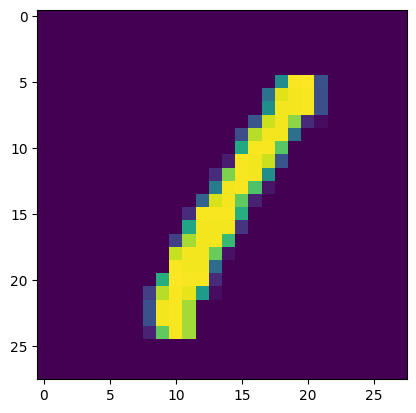

In [ ]:
#print(종속[0:100])
plt.imshow(독립[2])
#image_arrayR = image_array.reshape(3136, 784)
#print(gray_image_array)
